# MONDRIAN TREE: APPLICATION TO 2D MOONS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt

import Mondrian
import Plot

## moons dataset:

In [3]:
moons = datasets.make_moons(n_samples=50,noise=0.05,random_state=0)
X = moons[0] # data
y = moons[1] # true labels

df_moons = {'X1':X[:,0],'X2':X[:,1],'y':y}
df_moons = pd.DataFrame(df_moons)
df_moons.head()

,X1,X2,y
0,0.056181,0.075957,1
1,0.109739,0.965219,0
2,0.299474,0.954463,0
3,1.608086,-0.413872,1
4,0.969291,0.269144,0


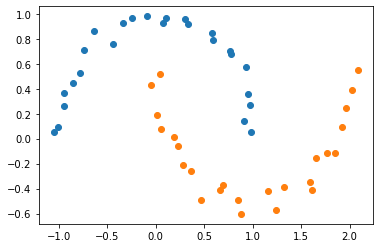

In [4]:
fig,ax = plt.subplots()
ax.scatter(df_moons.query('y==0')['X1'],df_moons.query('y==0')['X2'])
ax.scatter(df_moons.query('y==1')['X1'],df_moons.query('y==1')['X2'])

In [5]:
import Matrix

dist_matrix = Matrix.distance_matrix(X)

print(len(dist_matrix))
dist_matrix.head()

61250


,index1,index2,dist,magnitude_norm_vect,index_norm_vect,x1_0,x1_1,x2_0,x2_1,x_cut_0,x_cut_1,norm_vect_0,norm_vect_1,point_0,point_1,point_index,dist_point_cut
0,1,0,0.890874,0.524634,0,0.109739,0.965219,0.056181,0.075957,0.082960,0.520588,0.060118,0.998191,1.763637,-0.114046,49,-0.532447
1,2,0,0.911573,0.543982,1,0.299474,0.954463,0.056181,0.075957,0.177828,0.515210,0.266894,0.963726,1.763637,-0.114046,49,-0.183188
2,2,1,0.190040,0.149953,2,0.299474,0.954463,0.109739,0.965219,0.204607,0.959841,0.998397,-0.056598,1.763637,-0.114046,49,1.617312
3,3,0,1.627372,0.844399,3,1.608086,-0.413872,0.056181,0.075957,0.832134,-0.168958,0.953626,-0.300994,1.763637,-0.114046,49,0.871778
4,3,1,2.036403,0.445280,4,1.608086,-0.413872,0.109739,0.965219,0.858912,0.275674,0.735781,-0.677219,1.763637,-0.114046,49,0.929605


## MONDRIAN CLUSTERING TREE

In [6]:
# parameter setting
namefile = 'example\moons2D\moons2D' 
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [7]:
Mondrian.mondrian_tree(namefile,X,t0,lifetime,exp,metric)

PARTITIONING:
total number of splits: 18
MERGING:
range of possible number of clusters: 1-18


In [8]:
part,m,list_p,list_m_leaf = Mondrian.read_tree(namefile)

### OUTCOME OF THE PARTITIONING PHASE:

*part* is a dataframe. Each row corresponds to a polytope that has been created during the hierarchical splitting. Each polytope is associated to its creation time, its characterization number, the characterization number of the father, the boolean information of being a leaf, the polytope object created by the Polytope package. The column 'box' stores the vertices of the polytopes and is used in order to plot the results in 2 and 3 dimensions. 

In [9]:
print('total number of polytopes: ',len(part))
part.head()

total number of polytopes:  37


,time,father,part_number,leaf,polytope,box
0,0.000000,nan,0,False,"{'A': [[1.0, 0.0], [-1.0, 0.0], [0.0, 1.0], [0...","[[-1.2064837889, 1.0592473164], [-1.2064837889..."
1,0.062463,0,1,False,"{'A': [[1.0, 0.0], [0.0, 1.0], [0.0, -1.0], [-...","[[-0.7461058901, -0.6819628439], [2.244676263,..."
2,0.062463,0,2,False,"{'A': [[-1.0, 0.0], [0.0, 1.0], [0.0, -1.0], [...","[[-1.2064837889, -0.6819628439], [-0.746105890..."
3,0.427776,1,3,False,"{'A': [[0.0, 1.0], [0.0, -1.0], [-0.8665623573...","[[-0.7461058901, -0.6819628439], [0.8960167001..."
4,0.427776,1,4,False,"{'A': [[1.0, 0.0], [0.0, 1.0], [0.0, -1.0], [-...","[[0.8960167001, -0.6819628439], [2.244676263, ..."


*m* is a list of dictionaries. Each element corresponds to a polytope of the *part* dataframe and stores the samples contained in it.

In [10]:
print('number of elements of the list: ',len(m))
pd.DataFrame(m[0]).head()

number of elements of the list:  37


,0,1,index
0,0.056181,0.075957,0
1,0.109739,0.965219,1
2,0.299474,0.954463,2
3,1.608086,-0.413872,3
4,0.969291,0.269144,4


### OUTCOME OF THE MERGING PHASE: 

*list_p* is a list of dictionaries. Each element describes a configuration of the space division during the merging procedure. Each element can be read as a dataframe with each row corresponding to a polytope and storing the information about the neighboring polytopes and the subspaces that have been merged in order to obtain that configuration. The number of clusters is equal to the number of polytopes/rows.
The last element of the list reflects the initial condition after the connection of the single data subspaces with the nearest ones. The first element reflects the final condition, in which all the subspaces are merged and all the samples belongs to the same class.

In [11]:
#last element of the list: the subspaces number 13, 26, 28, 24 and 30 contain single samples and are already merged
pd.DataFrame(list_p[-1])

,part_number,neighbors,merged_part
0,11.0,"[16, 23, 31]",[]
1,14.0,"[25, 27]",[]
2,16.0,"[11, 23, 24, 27, 31, 32]",[]
3,19.0,"[20, 22, 29]",[]
4,20.0,"[19, 29, 30, 34, 35.0]",[]
5,21.0,"[22, 32]",[]
6,22.0,"[19, 21, 29, 32]",[]
7,23.0,"[11, 16, 24]",[]
8,24.0,"[16, 23, 26, 27]",[]
9,25.0,"[14, 26, 27]",[]


In [12]:
# first element of the list: all the subspaces are merged
pd.DataFrame(list_p[0])

,part_number,neighbors,merged_part
0,30.0,[],"[29.0, 31.0, 11.0, 23.0, 32.0, 25.0, 14.0, 26...."


In [13]:
# fifth element of the list:
pd.DataFrame(list_p[4])

,part_number,neighbors,merged_part
0,16.0,"[27, 30.0]",[]
1,20.0,"[30, 21.0, 27.0]",[]
2,21.0,"[30.0, 20]","[22.0, 19.0]"
3,27.0,"[16, 30, 20]","[36.0, 35.0, 34.0]"
4,30.0,"[20, 27, 21.0, 16]","[29.0, 31.0, 11.0, 23.0, 32.0, 25.0, 14.0, 26...."


*list_m_leaf* is a list of lists of dictionaries. Each element has the same structure of *m* and corresponds to an element of *list_p*. Each dictionary stores the samples contained in the corresponding polytope.

In [14]:
pd.DataFrame(list_m_leaf[0][0]).head()

,0,1,index
0,0.913889,0.140083,34.0
1,0.987377,0.051992,47.0
2,0.969291,0.269144,4.0
3,0.947925,0.353976,46.0
4,-0.444333,0.758342,23.0


## VISUALIZATION OF THE RESULTS

### PLOT OF THE FINAL SPACE PARTITIONS 

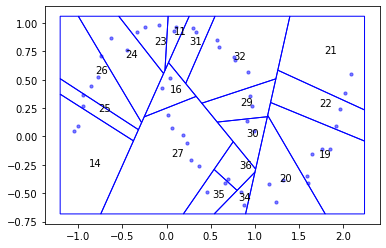

In [15]:
Plot.plot2D_partitioning(m,part)

### PLOT OF THE SPACE CLASSIFICATION FOR 2, 3 AND 6 NUMBER OF CLUSTERS

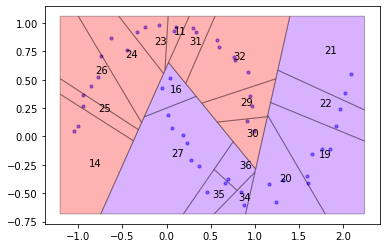

In [16]:
number_of_clusters = 2
Plot.plot2D_merging(part,list_m_leaf,list_p,number_of_clusters)

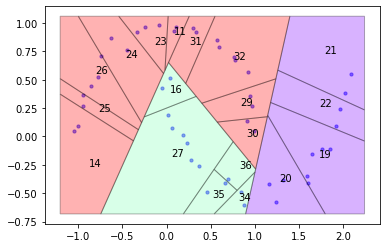

In [17]:
number_of_clusters = 3
Plot.plot2D_merging(part,list_m_leaf,list_p,number_of_clusters)

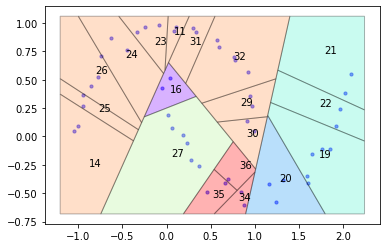

In [18]:
number_of_clusters = 6
Plot.plot2D_merging(part,list_m_leaf,list_p,number_of_clusters)